In [1]:
import sys, os

sys.path.append("/cr/users/filip/bin")

from utils.binaries import *
from utils.plotting import *

from utils.Auger.SD import Monitoring

10:46:22 [INFO] utils          -- ( +2430ms) -- import logging
10:46:22 [INFO] utils.binaries -- (  +114ms) -- import numpy as np
10:46:22 [INFO] utils.binaries -- (   +11ms) -- import uncertainties
10:46:22 [INFO] utils.binaries -- (  +208ms) -- import pandas as pd
10:46:22 [INFO] utils.binaries -- (    +2ms) -- import binaries.tools as tools
10:46:23 [INFO] utils.plotting -- (  +452ms) -- import matplotlib.pyplot as plt
10:46:23 [INFO] utils.plotting -- (  +249ms) -- import seaborn as so
10:46:23 [DBUG] utils.plotting -- (    +7ms) -- font size set to 9.5
10:46:23 [DBUG] utils.plotting -- (    +1ms) -- label size set to 13.0
10:46:23 [DBUG] utils.plotting -- (    +1ms) -- figure size set to [6.6, 3.3]
10:46:23 [DBUG] utils.plotting -- (    +0ms) -- markersize set to 2.0
10:46:23 [DBUG] utils.plotting -- (    +1ms) -- usetex set to False
10:46:23 [INFO] utils.plotting -- (    +2ms) -- import plotting.tools as plot


In [2]:
Stations = {
    "Nadia": 1723,
    "USA": 1251,
    "Vegetta": 1732,
    "Virginia": 699,
    "Constanza": 734,
    "Lucho": 972,
}

StationIDs, StationNames = list(Stations.values()), list(Stations.keys())

print(StationIDs)
print(StationNames)

[1723, 1251, 1732, 699, 734, 972]
['Nadia', 'USA', 'Vegetta', 'Virginia', 'Constanza', 'Lucho']


# Looking at Online Monitoring

In [3]:
timestamps = [[] for _ in range(len(list(Stations.keys())))]
VEMPeak = [[[], [], []] for _ in range(len(Stations.keys()))]
T1Rates = [[] for _ in range(len(list(Stations.keys())))]


for day in [13, 14, 15, 16, 17, 18, 19, 20, 21]:

    monit = Monitoring.Monit(2023, 3, day)
    fDuration = monit.Calibration.fEndSecond
    fPeak = monit.fCalibration.fPeak
    fRate = monit.fCalibration.fT1
    fTime = monit.fTime

    for i, station in enumerate(StationIDs):
        [timestamps[i].append(val) for val in fTime(station)]
        [
            T1Rates[i].append(val / dur)
            for val, dur in zip(fRate(station), fDuration(station))
        ]
        stationPeak = fPeak(station).T

        for j in range(3):
            [VEMPeak[i][j].append(val) for val in stationPeak[j]]

Multiple entries found for Calibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration


/tmp/ipykernel_751086/2389392168.py:16: RuntimeWarning: invalid value encountered in true_divide
  [T1Rates[i].append(val / dur) for val, dur in zip(fRate(station), fDuration(station))]


Multiple entries found for Calibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for Calibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for Calibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for Calibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for fCalibration, returning first occurence: fCalibration
Multiple entries found for Calib

Nadia: [0.01,  0.01,  0.02] 
USA: [0.07,  0.07,  0.07] 
Vegetta: [0.09,  0.08,  0.09] 
Virginia: [0.05,  0.06,  0.07] 
Constanza: [0.00,  0.00,  0.04] 
Lucho: [0.08,  0.07,  0.28] 


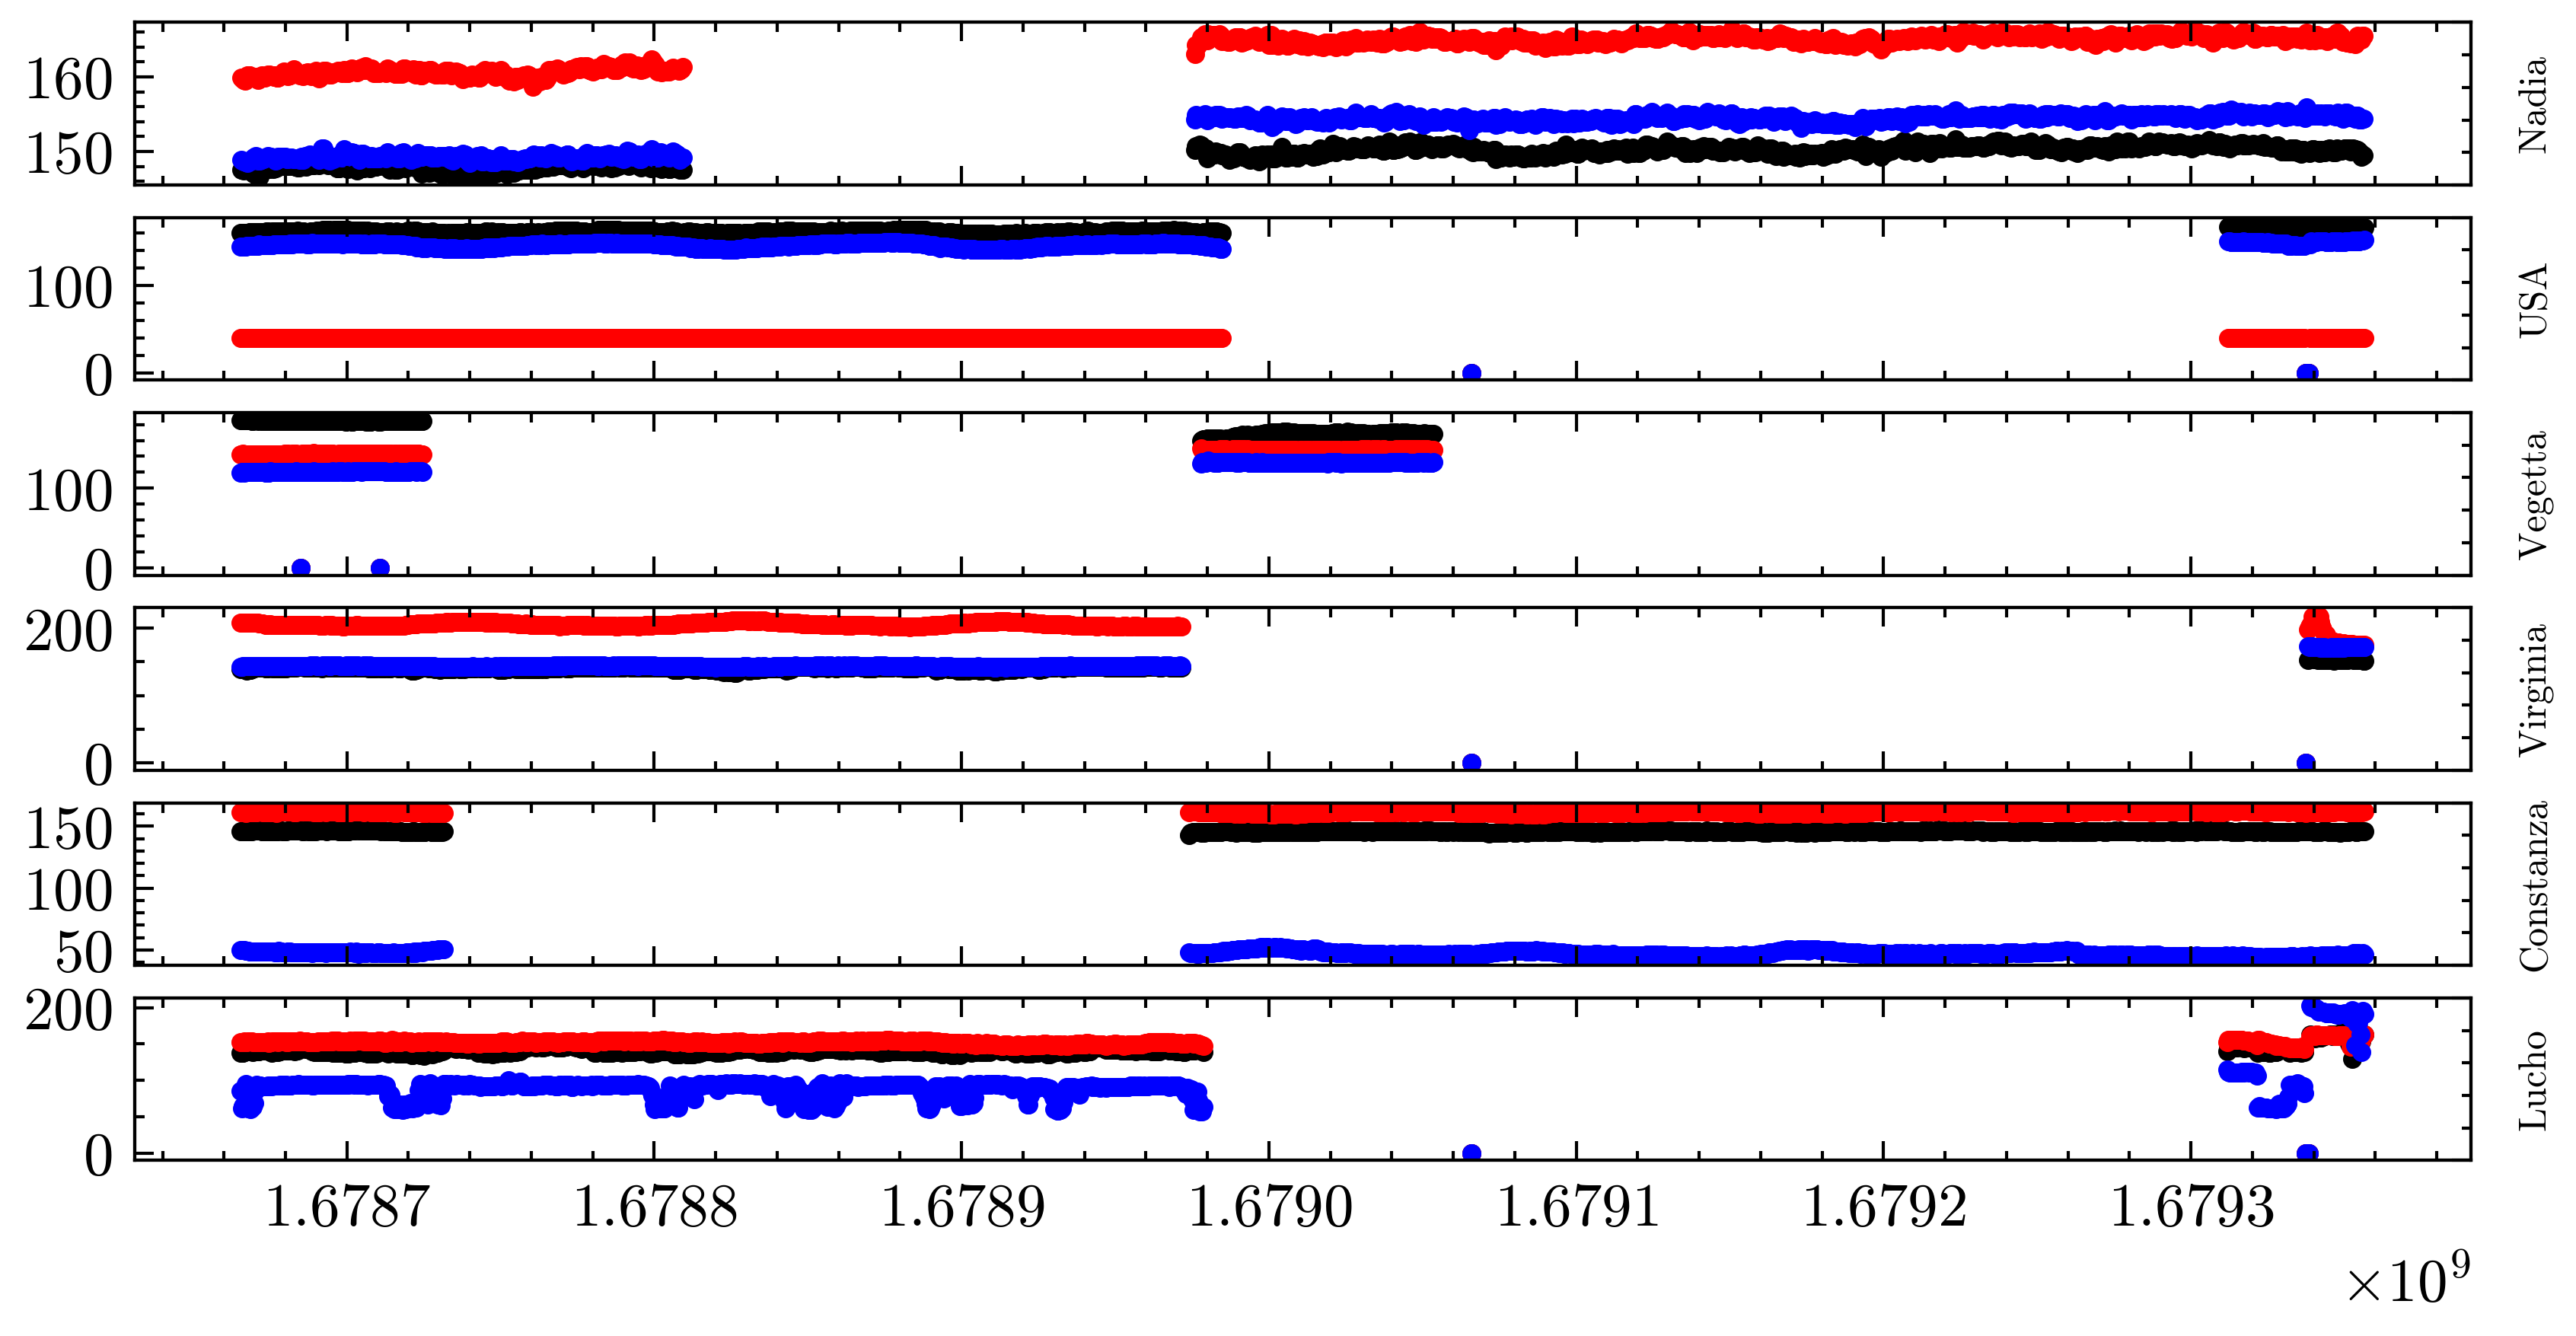

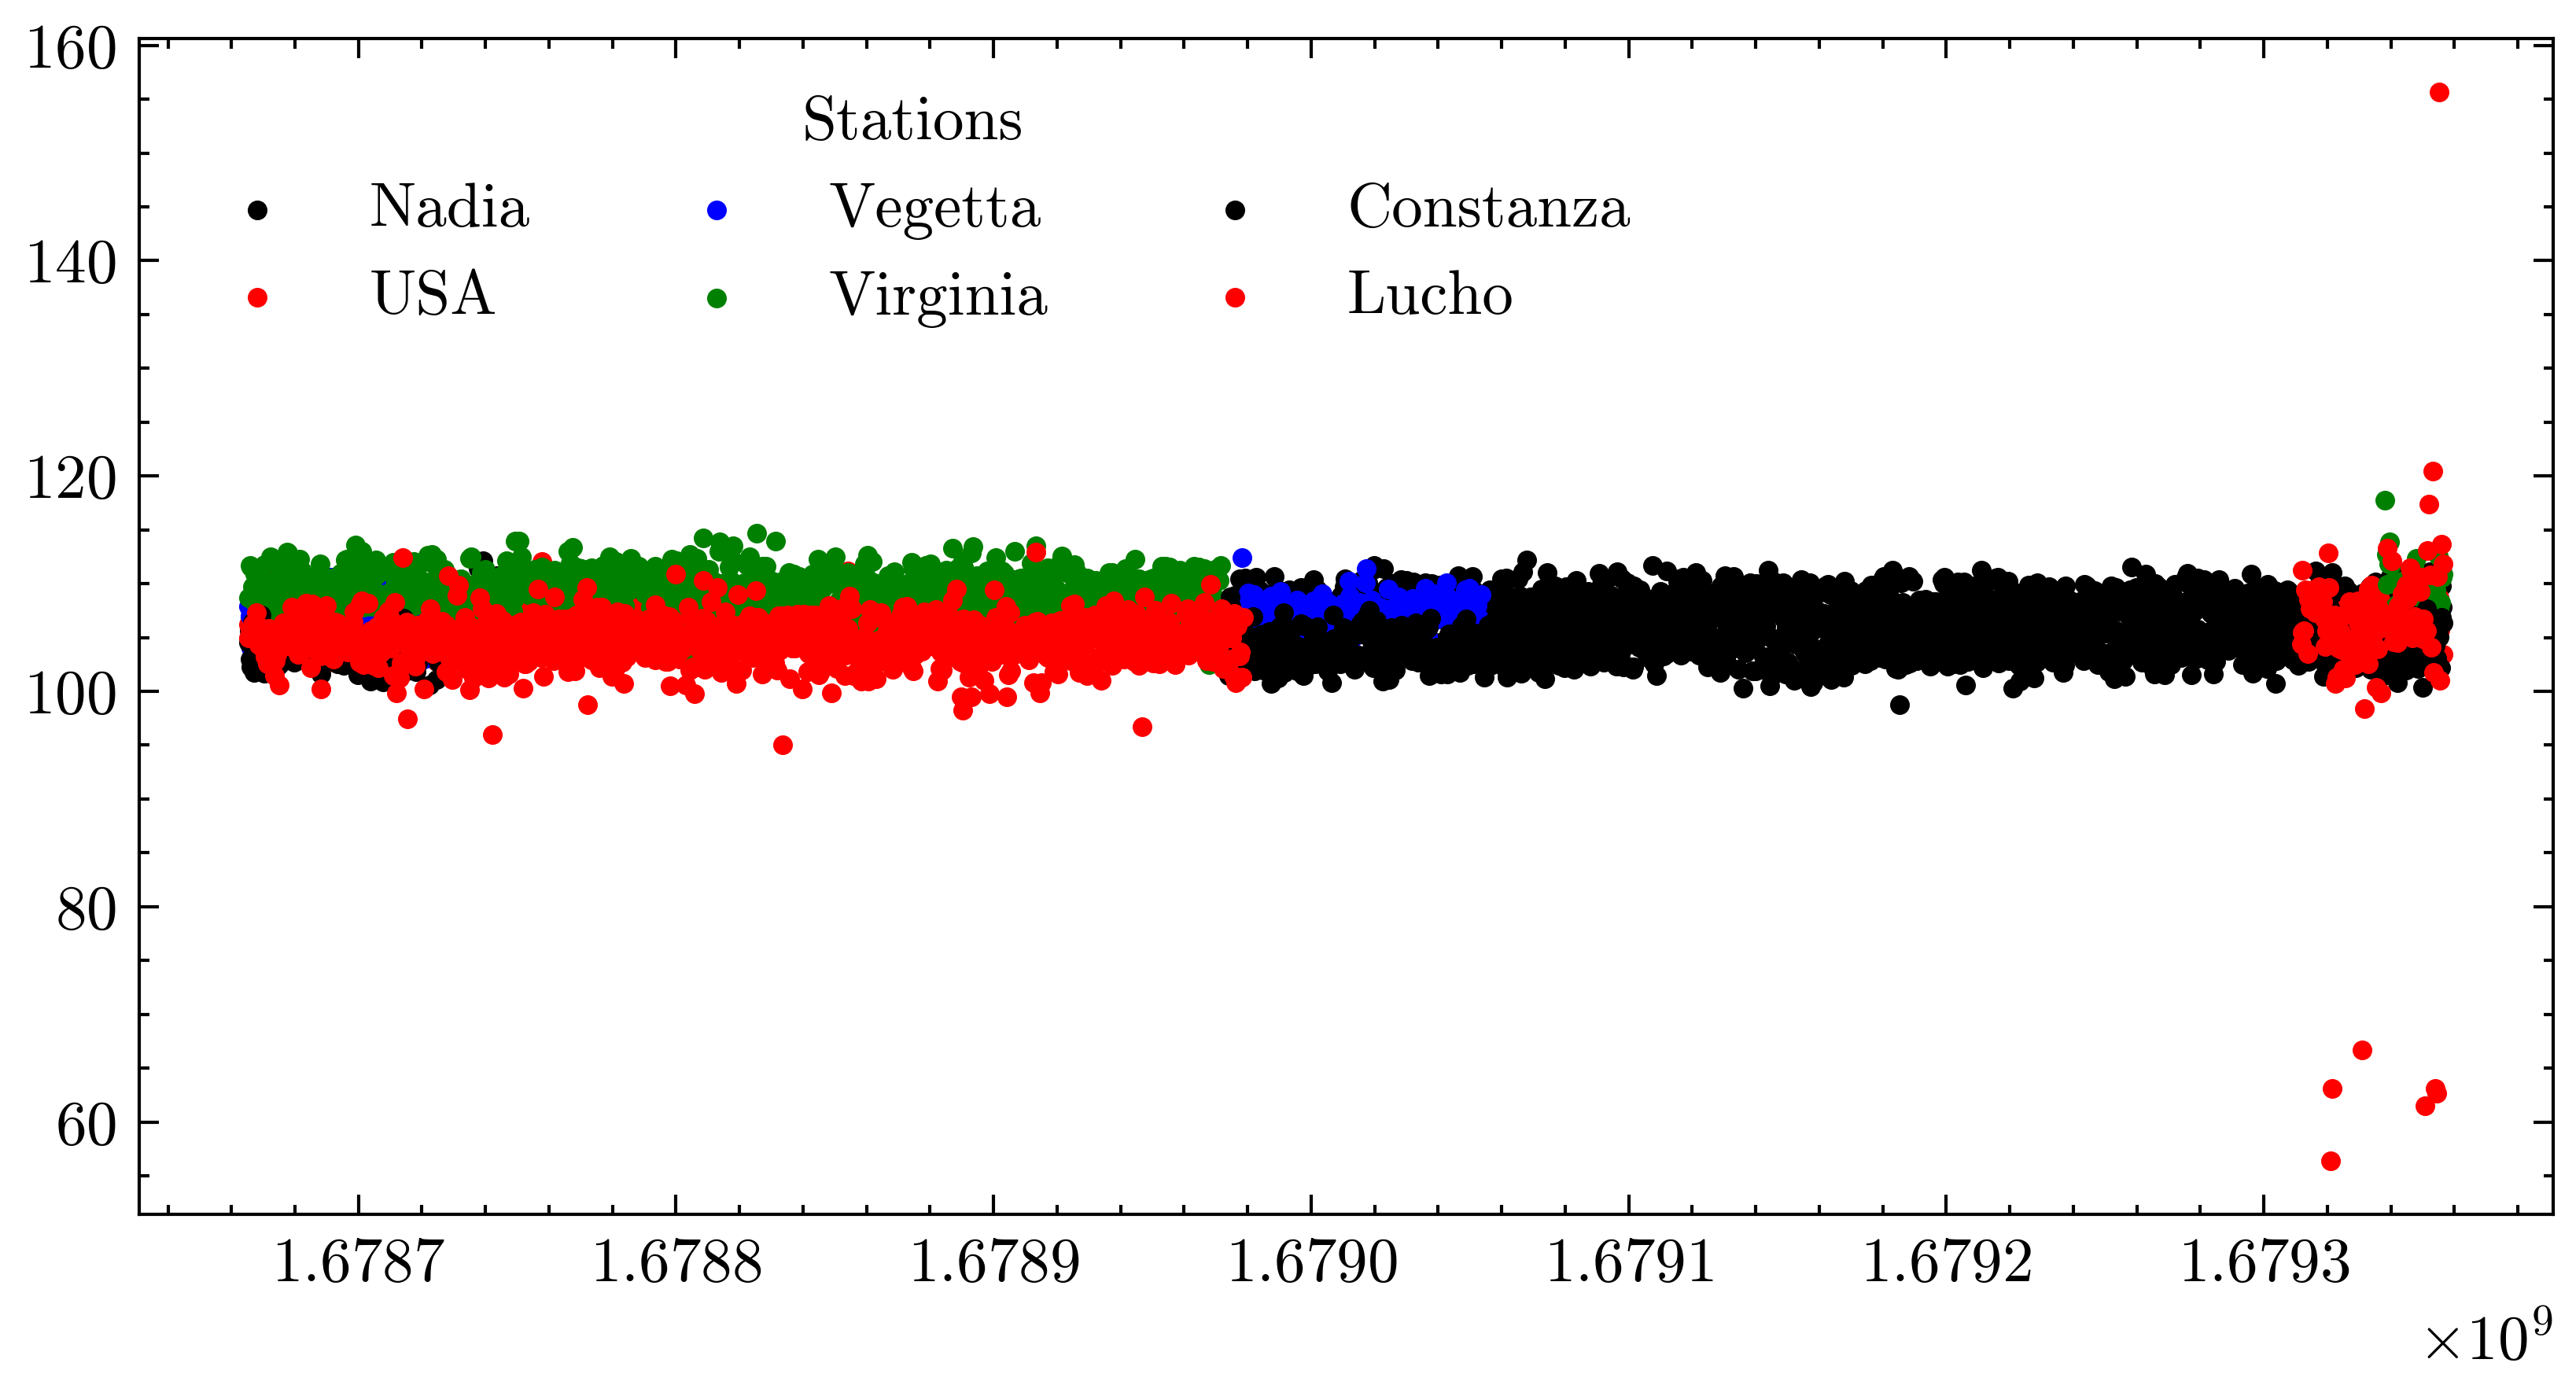

In [6]:
fig, axes = plt.subplots(len(StationIDs), sharex=True)
fig, ax0 = plt.subplots()

for i in range(len(StationIDs)):

    ax = axes[i]
    stationName = StationNames[i]
    t, v, r = timestamps[i], VEMPeak[i], T1Rates[i]

    ax.scatter(t, v[0], label="PMT #1")
    ax.scatter(t, v[1], label="PMT #2")
    ax.scatter(t, v[2], label="PMT #3")
    # ax.legend(title=stationName)

    print(f"{stationName}:", end=" ")
    print(f"[{np.std(v[0]) / np.mean(v[0]) :.2f}, ", end=" ")
    print(f"{np.std(v[1]) / np.mean(v[1]) :.2f}, ", end=" ")
    print(f"{np.std(v[2]) / np.mean(v[2]) :.2f}] ")

    axName = ax.twinx()
    axName.set_yticklabels([])
    axName.set_ylabel(stationName, fontsize=6)
    ax0.scatter(t, r, label=stationName)

ax0.legend(title="Stations", ncol=3)

# ax0.set_ylim()

In [5]:
print(monit.fCalibration.fEndSecond(1723))

Multiple entries found for fCalibration, returning first occurence: fCalibration
[]
